In [1]:
from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tqdm

In [12]:
cats = {'void': [0, 1, 2, 3, 4, 5, 6],
 'flat': [7, 8, 9, 10],
 'construction': [11, 12, 13, 14, 15, 16],
 'object': [17, 18, 19, 20],
 'nature': [21, 22],
 'sky': [23],
 'human': [24, 25],
 'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]}

In [24]:
image_dir = 'dataset/images'
mask_dir = 'dataset/masks'
image_list = os.listdir(image_dir)
mask_list = os.listdir(mask_dir)
image_list.sort()
mask_list.sort()
print(f'Number of images: {len(image_list)}\nNumber of masks: {len(mask_list)}')

# sanity check
for i in range(len(image_list)):
    assert image_list[i][:-16] == mask_list[i][:-20]

Number of images: 5000
Number of masks: 5000


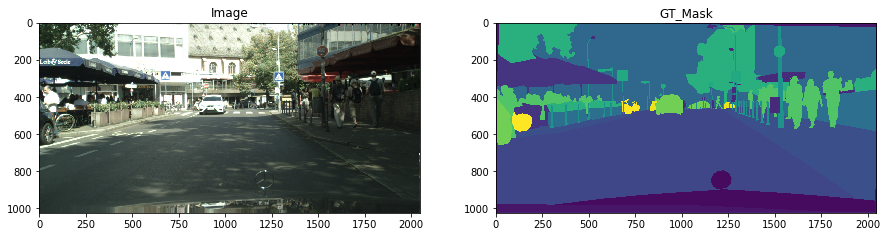

In [28]:
i = 2000
test_image = image.img_to_array(image.load_img(f'{image_dir}/{image_list[i]}'))/255.
test_mask = image.img_to_array(image.load_img(f'{mask_dir}/{mask_list[i]}', grayscale=True))
test_mask = np.squeeze(test_mask)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(test_image)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('GT_Mask')
ax1.imshow(test_mask)

In [ ]:
def get_mask(mask_list):
    for m in tqdm.tqdm(tmask_list):
        img = image.load_img(f'{train_dir}/{m}', grayscale=True, target_size=(512, 512))
        img = np.squeeze(image.img_to_array(img))

In [ ]:
def make_mask(img):
    mask = np.zeros((img.shape[0], img.shape[1], 8))
    for i in range(-1, 34):
        if i in cats['void']:
            mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
        elif i in cats['flat']:
            mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
        elif i in cats['construction']:
            mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
        elif i in cats['object']:
            mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
        elif i in cats['nature']:
            mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
        elif i in cats['sky']:
            mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
        elif i in cats['human']:
            mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
        elif i in cats['vehicle']:
            mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))
    mask = np.resize(mask,(img.shape[0]*img.shape[1], 8))
    return mask